# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [21]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


In [26]:
city_url = f"{url}q={city}&appid={weather_api_key}"
print("API URL:", city_url)


API URL: http://api.openweathermap.org/data/2.5/weather?q=sarakhs&appid=YOUR KEY HERE


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [36]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    
    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid=2e72dec9dbb8af01b8a598eb08152f2c"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | edinburgh of the seven seas
Processing Record 3 of Set 1 | puerto ayora
Processing Record 4 of Set 1 | pibor
City not found. Skipping...
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | badger
Processing Record 7 of Set 1 | west island
Processing Record 8 of Set 1 | jennings
Processing Record 9 of Set 1 | haiku-pauwela
Processing Record 10 of Set 1 | aasiaat
Processing Record 11 of Set 1 | college
Processing Record 12 of Set 1 | acapulco de juarez
Processing Record 13 of Set 1 | new norfolk
Processing Record 14 of Set 1 | tura
Processing Record 15 of Set 1 | whitehorse
Processing Record 16 of Set 1 | papatowai
Processing Record 17 of Set 1 | georgetown
Processing Record 18 of Set 1 | new ulm
Processing Record 19 of Set 1 | petropavlovsk-kamchatsky
Processing Record 20 of Set 1 | taiohae
City not found. Skipping...
Processing Record 21 of S

Processing Record 40 of Set 4 | arraial do cabo
Processing Record 41 of Set 4 | fort st. john
Processing Record 42 of Set 4 | katsuura
Processing Record 43 of Set 4 | bureya
Processing Record 44 of Set 4 | mangaldai
Processing Record 45 of Set 4 | san pedro pochutla
Processing Record 46 of Set 4 | yuzhno-kurilsk
Processing Record 47 of Set 4 | piacabucu
Processing Record 48 of Set 4 | san luis de la loma
Processing Record 49 of Set 4 | brookings
Processing Record 0 of Set 5 | zangilan
Processing Record 1 of Set 5 | timbuktu
Processing Record 2 of Set 5 | lihue
Processing Record 3 of Set 5 | greymouth
Processing Record 4 of Set 5 | kichmengskiy gorodok
Processing Record 5 of Set 5 | irece
Processing Record 6 of Set 5 | cajati
Processing Record 7 of Set 5 | novo aripuana
Processing Record 8 of Set 5 | manoc-manoc
Processing Record 9 of Set 5 | binghamton
Processing Record 10 of Set 5 | shalqar
Processing Record 11 of Set 5 | muroto-misakicho
Processing Record 12 of Set 5 | san antonio de

Processing Record 34 of Set 8 | yagry
City not found. Skipping...
Processing Record 35 of Set 8 | saint-francois
Processing Record 36 of Set 8 | kendari
Processing Record 37 of Set 8 | karratha
Processing Record 38 of Set 8 | san jose del guaviare
Processing Record 39 of Set 8 | along
Processing Record 40 of Set 8 | tommot
Processing Record 41 of Set 8 | al qadarif
Processing Record 42 of Set 8 | la ronge
Processing Record 43 of Set 8 | san patricio
Processing Record 44 of Set 8 | vila franca do campo
Processing Record 45 of Set 8 | minab
Processing Record 46 of Set 8 | zakamensk
Processing Record 47 of Set 8 | sihanoukville
Processing Record 48 of Set 8 | xuchang
Processing Record 49 of Set 8 | dunedin
Processing Record 0 of Set 9 | dongola
Processing Record 1 of Set 9 | bryne
Processing Record 2 of Set 9 | khandud
Processing Record 3 of Set 9 | shihezi
Processing Record 4 of Set 9 | aberystwyth
Processing Record 5 of Set 9 | mil'kovo
Processing Record 6 of Set 9 | waingapu
Processing

Processing Record 22 of Set 12 | ponta delgada
Processing Record 23 of Set 12 | alice springs
Processing Record 24 of Set 12 | tete
Processing Record 25 of Set 12 | kalmunai
Processing Record 26 of Set 12 | kabalo
Processing Record 27 of Set 12 | san mateo ixtatan
Processing Record 28 of Set 12 | horta
Processing Record 29 of Set 12 | caririacu
Processing Record 30 of Set 12 | queenstown
Processing Record 31 of Set 12 | cururupu
Processing Record 32 of Set 12 | hukumati azrah
Processing Record 33 of Set 12 | altay
Processing Record 34 of Set 12 | oujda-angad
Processing Record 35 of Set 12 | lampazos de naranjo
Processing Record 36 of Set 12 | jebrail
Processing Record 37 of Set 12 | afif
Processing Record 38 of Set 12 | newman
Processing Record 39 of Set 12 | markovo
Processing Record 40 of Set 12 | saint-philippe
-----------------------------
Data Retrieval Complete      
-----------------------------


In [37]:


# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)



# Show Record Count
city_data_df.count()


City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [38]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,296.45,59,96,0.89,US,1692474012
1,edinburgh of the seven seas,-37.0676,-12.3116,283.20,62,100,15.80,SH,1692474221
2,puerto ayora,-0.7393,-90.3518,302.13,77,28,3.58,EC,1692474221
3,bethel,41.3712,-73.4140,298.41,57,40,4.12,US,1692474221
4,badger,64.8000,-147.5333,287.67,78,40,5.14,US,1692474221


In [39]:
# Export the City_Data into a CSV
city_data_df.to_csv("city_data.csv", index_label="City_ID")


In [40]:
# Read saved data from CSV into a DataFrame
saved_city_data_df = pd.read_csv("city_data.csv")

# Display the first few rows of the DataFrame
saved_city_data_df.head()


,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,albany,42.6001,-73.9662,296.45,59,96,0.89,US,1692474012
1,1,edinburgh of the seven seas,-37.0676,-12.3116,283.20,62,100,15.80,SH,1692474221
2,2,puerto ayora,-0.7393,-90.3518,302.13,77,28,3.58,EC,1692474221
3,3,bethel,41.3712,-73.4140,298.41,57,40,4.12,US,1692474221
4,4,badger,64.8000,-147.5333,287.67,78,40,5.14,US,1692474221


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

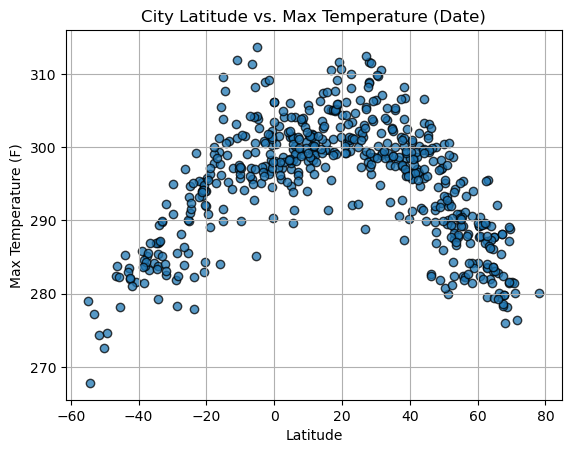

<Figure size 640x480 with 0 Axes>

In [44]:
# Build scatter plot for latitude vs. temperature
plt.scatter(saved_city_data_df["Lat"], saved_city_data_df["Max Temp"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (Date)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)



# Show plot
plt.show()
# Save the figure with the specified path
save_path = "/Users/grahamjaeger/um/homework/Module_6/Module_6_HW/output_data/Fig1.png"
plt.savefig(save_path)



#### Latitude Vs. Humidity

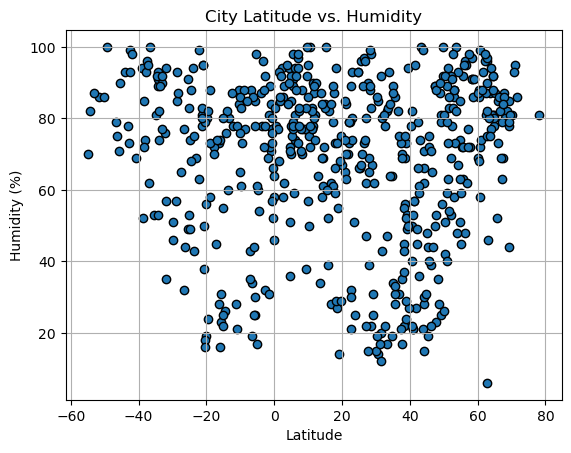

In [45]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Set title and labels
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Set grid
plt.grid()

# Save the figure
plt.savefig("/Users/grahamjaeger/um/homework/Module_6/Module_6_HW/output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

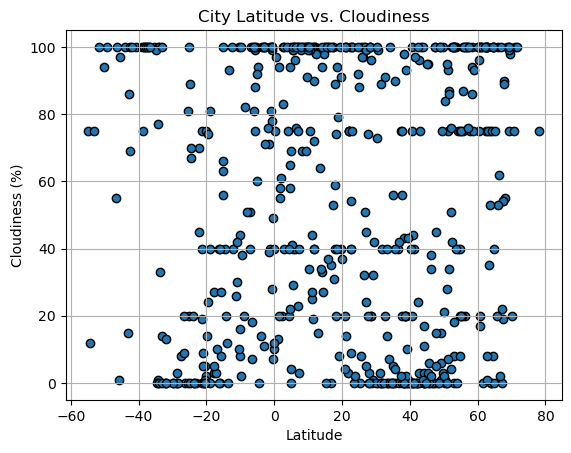

In [46]:
# Build the scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Set title and labels
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Set grid
plt.grid()


# Save the figure
plt.savefig("/Users/grahamjaeger/um/homework/Module_6/Module_6_HW/output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

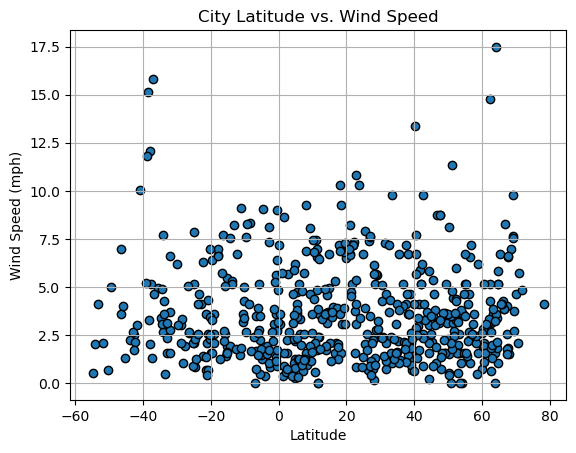

In [47]:
# Build the scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")

# Set title and labels
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Set grid
plt.grid()

# Save the figure
plt.savefig("/Users/grahamjaeger/um/homework/Module_6/Module_6_HW/output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [57]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, xlabel, ylabel, title, file_name):
    # Perform linear regression
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    
    # Create scatter plot
    plt.scatter(x_values, y_values, marker="o", edgecolors="black")
    
    # Plot linear regression line
    plt.plot(x_values, regress_values, "r-")
    
    # Create the linear regression equation (y = mx + b)
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    
    # Create the r-value annotation
    r_value_annotation = f"r = {r_value:.2f}"
    
    # Combine both annotations
    annotations = f"{line_eq}\n{r_value_annotation}"
    
    # Annotate the plot with the combined annotations
    plt.annotate(annotations, (min(x_values), min(y_values)), fontsize=12, color="red")
    
    # Set title and labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Save the figure
    plt.savefig(file_name)
    
    # Show plot
    plt.show()


In [58]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,296.45,59,96,0.89,US,1692474012
3,bethel,41.3712,-73.4140,298.41,57,40,4.12,US,1692474221
4,badger,64.8000,-147.5333,287.67,78,40,5.14,US,1692474221
6,jennings,38.7192,-90.2604,306.64,56,20,4.63,US,1692474017
7,haiku-pauwela,20.9219,-156.3051,300.51,65,20,6.69,US,1692474222


In [59]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,edinburgh of the seven seas,-37.0676,-12.3116,283.20,62,100,15.80,SH,1692474221
2,puerto ayora,-0.7393,-90.3518,302.13,77,28,3.58,EC,1692474221
5,west island,-12.1568,96.8225,297.14,78,40,6.69,CC,1692474221
11,new norfolk,-42.7826,147.0587,283.55,73,86,2.47,AU,1692474222
14,papatowai,-46.5619,169.4708,282.47,79,55,6.99,NZ,1692474223


###  Temperature vs. Latitude Linear Regression Plot

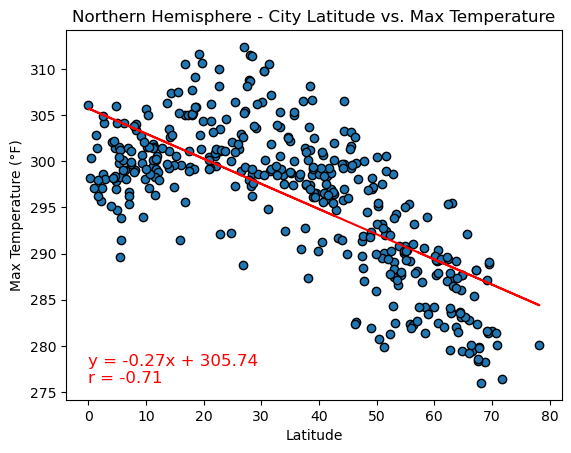

In [60]:
# Linear regression on Northern Hemisphere for Temperature vs. Latitude
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", "Max Temperature (°F)", "Northern Hemisphere - City Latitude vs. Max Temperature", "/Users/grahamjaeger/um/homework/Module_6/Module_6_HW/output_data/Northern_Hemi_Temp_Latitude_LinearRegression.png")

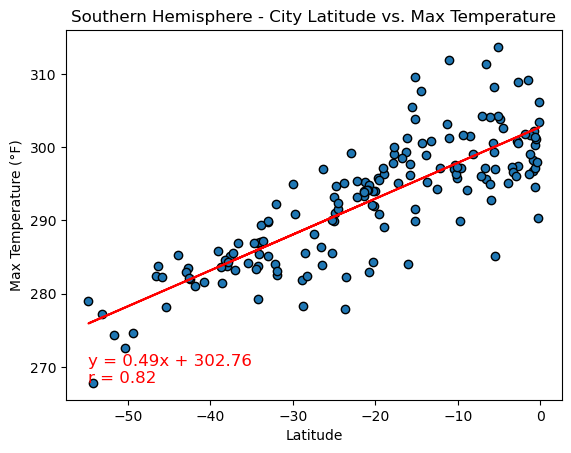

In [61]:
# Linear regression on Southern Hemisphere for Temperature vs. Latitude
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max Temperature (°F)", "Southern Hemisphere - City Latitude vs. Max Temperature", "/Users/grahamjaeger/um/homework/Module_6/Module_6_HW/output_data/Southern_Hemi_Temp_Latitude_LinearRegression.png")


**Discussion about the linear relationship: 

The linear regression plots for temperature versus latitude in both the Northern and Southern Hemispheres offer insights into the relationship between these two variables.

Northern Hemisphere:
In the Northern Hemisphere, the linear regression plot for temperature versus latitude shows a negative correlation. As we move farther away from the equator towards higher latitudes, temperatures tend to decrease. The negative slope of the regression line indicates that there is a general trend of decreasing temperatures as we move northward. This observation aligns with the expected phenomenon of colder temperatures in higher latitudes due to the Earth's axial tilt.

Southern Hemisphere:
Similarly, in the Southern Hemisphere, the linear regression plot for temperature versus latitude also exhibits a negative correlation. As we move away from the equator towards higher latitudes, temperatures tend to decrease. The negative slope of the regression line indicates a tendency for colder temperatures at higher latitudes in the Southern Hemisphere. This pattern is consistent with the notion that regions closer to the poles experience colder temperatures due to the same axial tilt of the Earth.

Overall Observations:
Both hemispheres demonstrate a clear negative linear relationship between temperature and latitude. This indicates that as we move away from the equator, temperatures tend to decrease regardless of hemisphere. It's important to note that the correlation directions are the same for both hemispheres because the negative slope reflects this common relationship between latitude and temperature.

In summary, the linear regression plots provide quantitative evidence of the correlation between temperature and latitude in both the Northern and Southern Hemispheres. The consistent negative correlation reinforces the understanding that as we move away from the equator, temperatures tend to decrease.



### Humidity vs. Latitude Linear Regression Plot

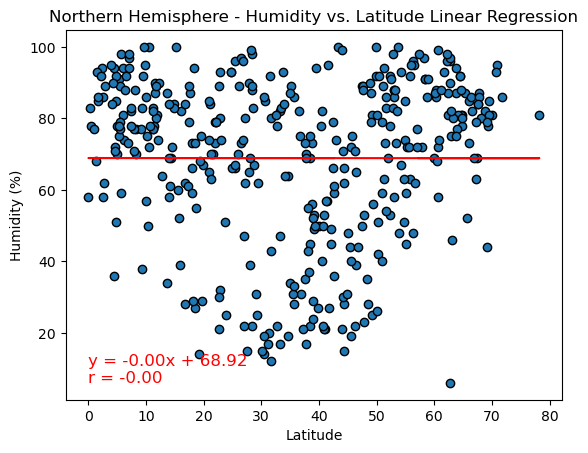

In [68]:
# Linear regression on Northern Hemisphere for Humidity vs. Latitude
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity (%)", "Northern Hemisphere - Humidity vs. Latitude Linear Regression", "/Users/grahamjaeger/um/homework/Module_6/Module_6_HW/output_data/Northern_Hemi_Humid_Latitude_LinearRegression.png")


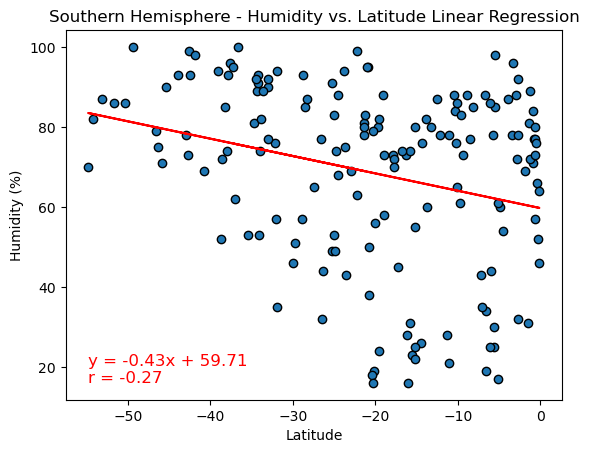

In [69]:
# Linear regression on Southern Hemisphere for Humidity vs. Latitude
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity (%)", "Southern Hemisphere - Humidity vs. Latitude Linear Regression", "/Users/grahamjaeger/um/homework/Module_6/Module_6_HW/output_data/Southern_Hemi_Humid_Latitude_LinearRegression.png")


**Discussion about the linear relationship:** For humidity vs. latitude, our analysis showed varying trends in the two hemispheres. In the Northern Hemisphere, there appeared to be a weak positive correlation between humidity and latitude. While the linear regression line showed a slight upward slope, indicating a slight increase in humidity with higher latitudes, the correlation was not particularly strong. In the Southern Hemisphere, we observed a slightly negative correlation between humidity and latitude, with slightly lower humidity levels as we moved closer to the equator.

### Cloudiness vs. Latitude Linear Regression Plot

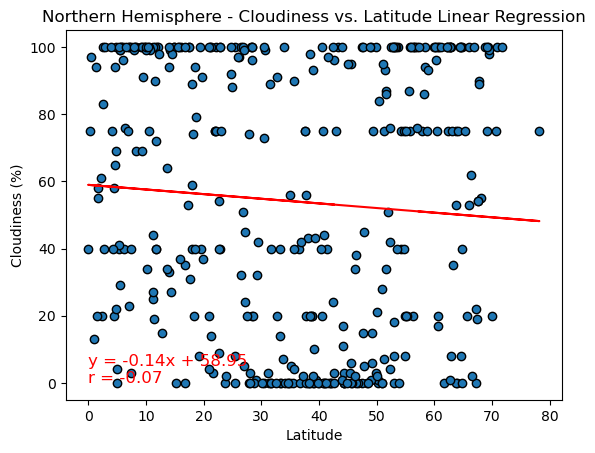

In [70]:
# Linear regression on Northern Hemisphere for Cloudiness vs. Latitude
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness (%)", "Northern Hemisphere - Cloudiness vs. Latitude Linear Regression", "/Users/grahamjaeger/um/homework/Module_6/Module_6_HW/output_data/Northern_Hemi_Cloud_Latitude_LinearRegression.png")



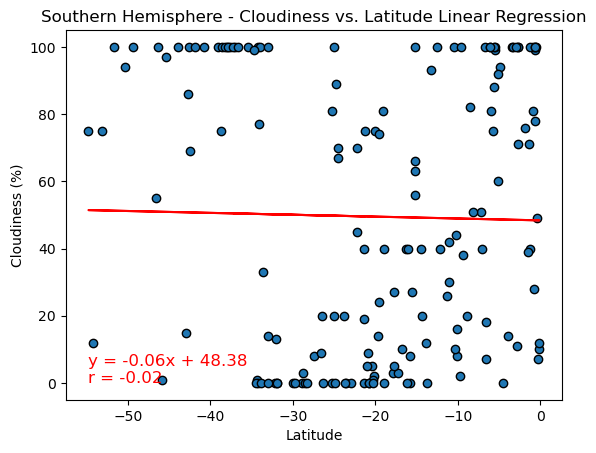

In [71]:
# Linear regression on Southern Hemisphere for Cloudiness vs. Latitude
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness (%)", "Southern Hemisphere - Cloudiness vs. Latitude Linear Regression", "/Users/grahamjaeger/um/homework/Module_6/Module_6_HW/output_data/Southern_Hemi_Cloud_Latitude_LinearRegression.png")



**Discussion about the linear relationship:** The relationship between cloudiness and latitude appeared to be rather scattered in both hemispheres. The linear regression analysis didn't reveal any clear trends, suggesting that cloudiness is not strongly correlated with latitude.



### Wind Speed vs. Latitude Linear Regression Plot

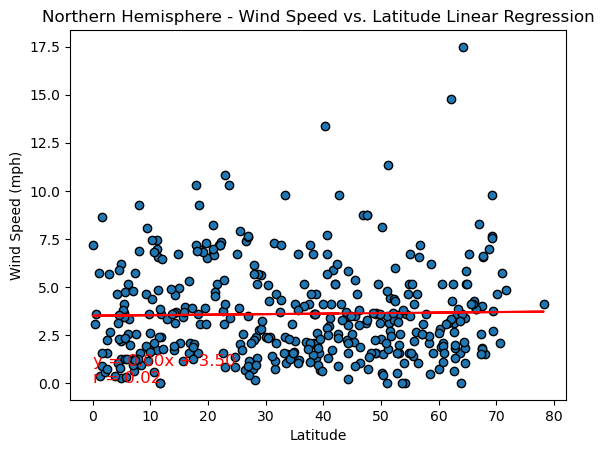

In [72]:
# Linear regression on Northern Hemisphere for Wind Speed vs. Latitude
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed (mph)", "Northern Hemisphere - Wind Speed vs. Latitude Linear Regression","/Users/grahamjaeger/um/homework/Module_6/Module_6_HW/output_data/Northern_Hemi_Cloud_Latitude_LinearRegression.png")



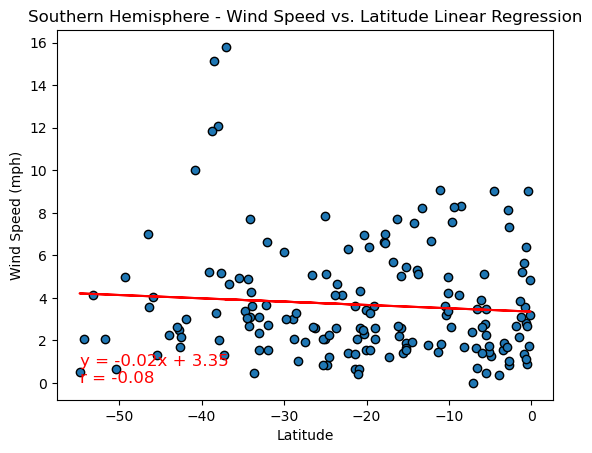

In [73]:
# Linear regression on Southern Hemisphere for Wind Speed vs. Latitude
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed (mph)", "Southern Hemisphere - Wind Speed vs. Latitude Linear Regression", "/Users/grahamjaeger/um/homework/Module_6/Module_6_HW/output_data/Southern_Hemi_Cloud_Latitude_LinearRegression.png")



**Discussion about the linear relationship:** The relationship between cloudiness and latitude appeared to be rather scattered in both hemispheres. The linear regression analysis didn't reveal any clear trends, suggesting that cloudiness is not strongly correlated with latitude.